In [5]:
import urllib
import os 
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import warnings
warnings.filterwarnings("ignore")

In [6]:
IMAGE_WIDTH= 224
IMAGE_HEIGHT= 224
IMAGE_CHANNELS= 1
IMAGE_SIZE= (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 20

In [7]:
os.getcwd()

'c:\\Users\\danie\\Bootcamp\\Proyectos\\Screening_of_Autism_ML_project_final\\Screening_of_Autism_ML_project_final\\notebooks'

In [8]:
# Rutas a las carpetas de imágenes
base_dir = os.getcwd()
autistic_dir = os.path.join(base_dir, 'autistic')
non_autistic_dir = os.path.join(base_dir, 'non_autistic')


image_paths = []
labels = []

# Carpeta autistic
for image_name in os.listdir(autistic_dir):
    image_paths.append(os.path.join(autistic_dir, image_name))
    labels.append('autistic')

# Carpeta non_autistic
for image_name in os.listdir(non_autistic_dir):
    image_paths.append(os.path.join(non_autistic_dir, image_name))
    labels.append('non_autistic')

# Crear el DataFrame
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

df.head()


,image_path,label
0,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic
1,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic
2,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic
3,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic
4,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic


In [9]:
target_map = {'autistic': 0,
              'non_autistic': 1}

In [10]:
df['target'] = df['label'].map(target_map)

In [11]:
df

,image_path,label,target
0,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0
1,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0
2,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0
3,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0
4,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0
...,...,...,...
2931,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1
2932,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1
2933,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1
2934,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1


In [12]:
ruta_imagen = df.loc[0, 'image_path']

In [13]:
img = cv2.imread(ruta_imagen, 0)
img.shape

(224, 224)

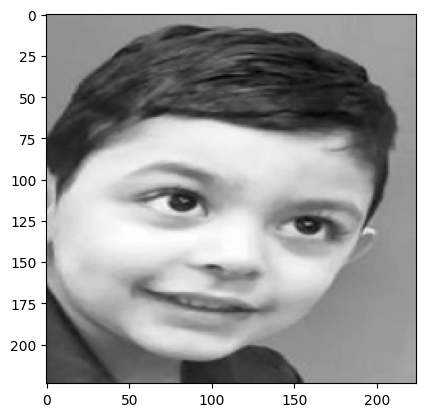

In [14]:
plt.imshow(img, cmap='gray')

In [15]:
# Función para leer la imagen, escalarla
def procesar_imagen(path):
    img = cv2.imread(path, 0)
    img_scale = np.array(img) / 255.0
    return img_scale

In [16]:
from PIL import Image

# Ejemplo para obtener las dimensiones de una imagen
with Image.open(df['image_path'][0]) as img:
    width, height = img.size

print(f"Ancho: {width}, Alto: {height}")

# Chequeo Autistic
for image_name in os.listdir(autistic_dir):  
    image_path = os.path.join(autistic_dir, image_name)
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"{image_name} - Ancho: {width}, Alto: {height}")


Ancho: 224, Alto: 224
0001.jpg - Ancho: 224, Alto: 224
0002.jpg - Ancho: 224, Alto: 224
0003.jpg - Ancho: 224, Alto: 224
0004.jpg - Ancho: 224, Alto: 224
0005.jpg - Ancho: 224, Alto: 224
0006.jpg - Ancho: 224, Alto: 224
0007.jpg - Ancho: 224, Alto: 224
0008.jpg - Ancho: 224, Alto: 224
0009.jpg - Ancho: 224, Alto: 224
0010.jpg - Ancho: 224, Alto: 224
0011.jpg - Ancho: 224, Alto: 224
0012.jpg - Ancho: 224, Alto: 224
0013.jpg - Ancho: 224, Alto: 224
0014.jpg - Ancho: 224, Alto: 224
0015.jpg - Ancho: 224, Alto: 224
0016.jpg - Ancho: 224, Alto: 224
0017.jpg - Ancho: 224, Alto: 224
0018.jpg - Ancho: 224, Alto: 224
0019.jpg - Ancho: 224, Alto: 224
0020.jpg - Ancho: 224, Alto: 224
0021.jpg - Ancho: 224, Alto: 224
0022.jpg - Ancho: 224, Alto: 224
0023.jpg - Ancho: 224, Alto: 224
0024.jpg - Ancho: 224, Alto: 224
0025.jpg - Ancho: 224, Alto: 224
0026.jpg - Ancho: 224, Alto: 224
0027.jpg - Ancho: 224, Alto: 224
0028.jpg - Ancho: 224, Alto: 224
0029.jpg - Ancho: 224, Alto: 224
0030.jpg - Ancho: 224

In [17]:
# Chequeo Non_Autistic
for image_name in os.listdir(non_autistic_dir):
    image_path = os.path.join(autistic_dir, image_name)
    with Image.open(image_path) as img:
        width, height = img.size
        print(f"{image_name} - Ancho: {width}, Alto: {height}")


0001.jpg - Ancho: 224, Alto: 224
0002.jpg - Ancho: 224, Alto: 224
0003.jpg - Ancho: 224, Alto: 224
0004.jpg - Ancho: 224, Alto: 224
0005.jpg - Ancho: 224, Alto: 224
0006.jpg - Ancho: 224, Alto: 224
0007.jpg - Ancho: 224, Alto: 224
0008.jpg - Ancho: 224, Alto: 224
0009.jpg - Ancho: 224, Alto: 224
0010.jpg - Ancho: 224, Alto: 224
0011.jpg - Ancho: 224, Alto: 224
0012.jpg - Ancho: 224, Alto: 224
0013.jpg - Ancho: 224, Alto: 224
0014.jpg - Ancho: 224, Alto: 224
0015.jpg - Ancho: 224, Alto: 224
0016.jpg - Ancho: 224, Alto: 224
0017.jpg - Ancho: 224, Alto: 224
0018.jpg - Ancho: 224, Alto: 224
0019.jpg - Ancho: 224, Alto: 224
0020.jpg - Ancho: 224, Alto: 224
0021.jpg - Ancho: 224, Alto: 224
0022.jpg - Ancho: 224, Alto: 224
0023.jpg - Ancho: 224, Alto: 224
0024.jpg - Ancho: 224, Alto: 224
0025.jpg - Ancho: 224, Alto: 224
0026.jpg - Ancho: 224, Alto: 224
0027.jpg - Ancho: 224, Alto: 224
0028.jpg - Ancho: 224, Alto: 224
0029.jpg - Ancho: 224, Alto: 224
0030.jpg - Ancho: 224, Alto: 224
0031.jpg -

In [18]:
df['Imagenes'] = df['image_path'].apply(procesar_imagen)

In [19]:
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df

,image_path,label,target,Imagenes
0,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.7294117647058823, 0.7294117647058823, 0.72..."
1,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.1450980392156863, 0.13333333333333333, 0.1..."
2,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1,"[[0.1843137254901961, 0.25098039215686274, 0.3..."
3,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.5450980392156862, 0.6196078431372549, 0.67..."
4,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.34901960784313724, 0.34901960784313724, 0...."
...,...,...,...,...
2931,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.49019607843137253, 0.4627450980392157, 0.5..."
2932,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.8823529411764706, 0.8901960784313725, 0.90..."
2933,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,autistic,0,"[[0.9490196078431372, 0.9490196078431372, 0.94..."
2934,c:\Users\danie\Bootcamp\Proyectos\Screening_of...,non_autistic,1,"[[0.7647058823529411, 0.7607843137254902, 0.74..."


In [21]:
df['Imagenes'][0]

array([[0.72941176, 0.72941176, 0.72941176, ..., 0.78823529, 0.79215686,
        0.79215686],
       [0.73333333, 0.72941176, 0.73333333, ..., 0.79215686, 0.79607843,
        0.79607843],
       [0.7372549 , 0.7372549 , 0.7372549 , ..., 0.79215686, 0.79607843,
        0.79607843],
       ...,
       [0.10980392, 0.11372549, 0.11372549, ..., 0.45490196, 0.45882353,
        0.45882353],
       [0.10980392, 0.11764706, 0.11372549, ..., 0.45490196, 0.45882353,
        0.45490196],
       [0.10980392, 0.11764706, 0.11372549, ..., 0.45490196, 0.45098039,
        0.44705882]])

In [22]:
df['Imagenes'][0].shape

(224, 224)

In [23]:
#Convierto X en un array de numpy
X = np.stack(df['Imagenes'].values)
y = np.array(df['target'])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)


(2348, 224, 224)
(588, 224, 224)
(2348,)
(588,)


##  A continuación voy a entrenar mi primer modelo de CNN, luego lo someteré a experimentación

In [26]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=5)
from keras.callbacks import ModelCheckpoint
mcheckpoint = ModelCheckpoint("callback_model_1.h5")

In [27]:
from tensorflow import keras


layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]

model = keras.Sequential(layers)
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
                )

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 373248)            0         
                                                                 
 dense (Dense)               (None, 128)               4

In [29]:
history_1 = model.fit(X_train,
                        y_train,
                        epochs = EPOCHS,
                        batch_size = BATCH_SIZE,
                        callbacks = [earlystop, mcheckpoint],
                        validation_split = 0.2
    
)

Epoch 1/20


33/59 [===============>..............] - ETA: 23s - loss: 1.2199 - accuracy: 0.5000

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(X_test, y_test)
results

19/19 [==============================] - 2s 128ms/step - loss: 1.1613 - accuracy: 0.6973


[1.1613481044769287, 0.6972789168357849]

In [ ]:
model.predict(X_test).round(0)

19/19 [==============================] - 2s 128ms/step


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [ ]:
from tensorflow.keras.optimizers import Adam

mcheckpoint = ModelCheckpoint("callback_model_2.h5")
learning_rate = 0.001 
optimizer = Adam(learning_rate=learning_rate)


layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.1),  
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1), 
    
    keras.layers.Dense(1, activation='sigmoid')
]


model_2 = keras.Sequential(layers)
model_2.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs = EPOCHS,
                        batch_size = BATCH_SIZE,
                        callbacks = [earlystop, mcheckpoint],
                        validation_split = 0.2
    
)

Epoch 1/20
59/59 [==============================] - 48s 812ms/step - loss: 0.9455 - accuracy: 0.5325 - val_loss: 0.6898 - val_accuracy: 0.5553
Epoch 2/20
59/59 [==============================] - 48s 811ms/step - loss: 0.6591 - accuracy: 0.6326 - val_loss: 0.6292 - val_accuracy: 0.6404
Epoch 3/20
59/59 [==============================] - 49s 829ms/step - loss: 0.6367 - accuracy: 0.6672 - val_loss: 0.6653 - val_accuracy: 0.5830
Epoch 4/20
59/59 [==============================] - 49s 828ms/step - loss: 0.5504 - accuracy: 0.7157 - val_loss: 0.6488 - val_accuracy: 0.6362
Epoch 5/20
59/59 [==============================] - 48s 821ms/step - loss: 0.4743 - accuracy: 0.7716 - val_loss: 0.6527 - val_accuracy: 0.6489
Epoch 6/20
59/59 [==============================] - 48s 821ms/step - loss: 0.3689 - accuracy: 0.8419 - val_loss: 0.7730 - val_accuracy: 0.6532
Epoch 7/20
59/59 [==============================] - 51s 861ms/step - loss: 0.2458 - accuracy: 0.8978 - val_loss: 0.8402 - val_accuracy: 0.6128

In [ ]:
results = model_2.evaluate(X_test, y_test)
results

19/19 [==============================] - 3s 132ms/step - loss: 0.6643 - accuracy: 0.7262


[0.6642926335334778, 0.726190447807312]

In [ ]:
model_2.predict(X_test).round(0)

19/19 [==============================] - 3s 130ms/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [ ]:
from tensorflow.keras import regularizers

mcheckpoint = ModelCheckpoint("callback_model_3.h5")

optimizer = Adam(learning_rate=0.0005)  
layers = [
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(1, activation='sigmoid')
]

model_3 = keras.Sequential(layers)
model_3.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])


In [ ]:
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs = EPOCHS,
                        batch_size = BATCH_SIZE,
                        callbacks = [earlystop, mcheckpoint],
                        validation_split = 0.2
    
)

Epoch 1/20
59/59 [==============================] - 18s 302ms/step - loss: 0.8546 - accuracy: 0.5096 - val_loss: 0.7687 - val_accuracy: 0.6660
Epoch 2/20
59/59 [==============================] - 18s 298ms/step - loss: 0.7536 - accuracy: 0.6006 - val_loss: 0.7174 - val_accuracy: 0.6660
Epoch 3/20
59/59 [==============================] - 18s 302ms/step - loss: 0.7222 - accuracy: 0.6443 - val_loss: 0.7112 - val_accuracy: 0.6553
Epoch 4/20
59/59 [==============================] - 17s 294ms/step - loss: 0.6950 - accuracy: 0.6592 - val_loss: 0.7023 - val_accuracy: 0.6723
Epoch 5/20
59/59 [==============================] - 18s 302ms/step - loss: 0.6694 - accuracy: 0.7167 - val_loss: 0.7064 - val_accuracy: 0.6660
Epoch 6/20
59/59 [==============================] - 17s 289ms/step - loss: 0.6782 - accuracy: 0.7029 - val_loss: 0.7183 - val_accuracy: 0.6702
Epoch 7/20
59/59 [==============================] - 17s 291ms/step - loss: 0.6470 - accuracy: 0.7332 - val_loss: 0.7052 - val_accuracy: 0.6723

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 186624)            0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [ ]:
results = model_3.evaluate(X_test, y_test)
results

19/19 [==============================] - 1s 55ms/step - loss: 0.6743 - accuracy: 0.7347


[0.6742802858352661, 0.7346938848495483]

In [ ]:
predicciones_probabilidades = model_3.predict(X_test)
predicciones = (predicciones_probabilidades > 0.5).astype("int32").squeeze()

19/19 [==============================] - 1s 54ms/step


In [ ]:
indices_incorrectos = np.where(predicciones != y_test)[0]

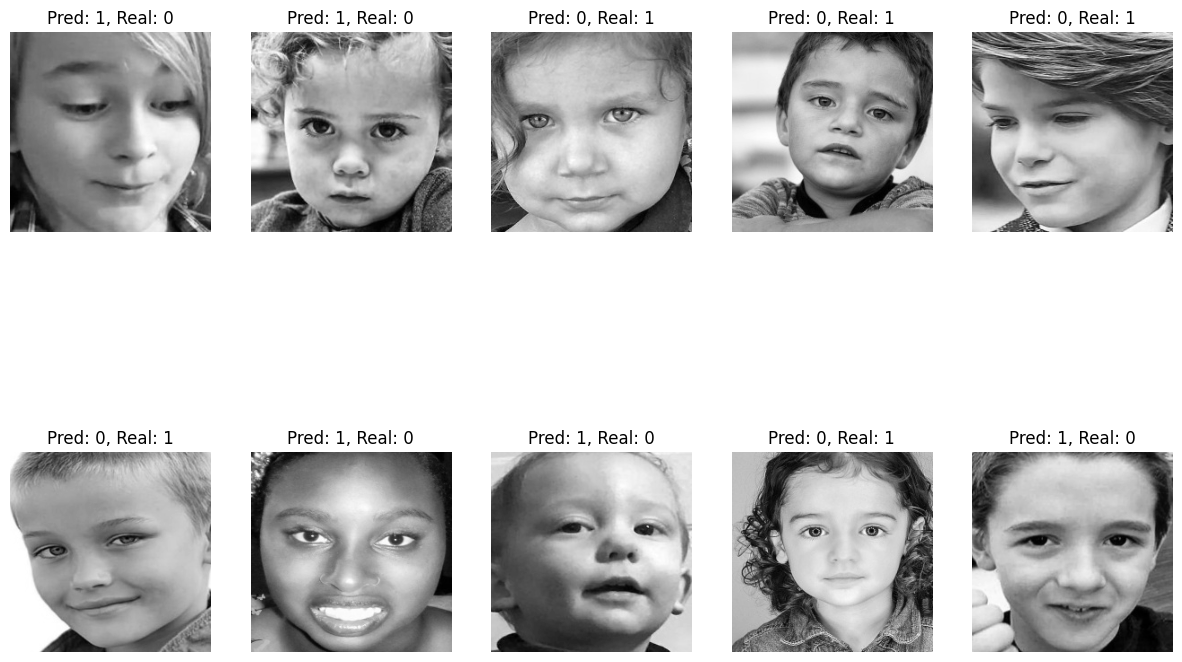

In [ ]:
num_imagenes = 10

# Visualizar las primeras 'num_imagenes' imágenes incorrectas

plt.figure(figsize=(15,10))
for i, idx in enumerate(indices_incorrectos[:num_imagenes]):
    img = X_test[idx]
    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze(), cmap='gray')  # Ajustar para imágenes en color si es necesario
    plt.title(f"Pred: {predicciones[idx]}, Real: {y_test[idx]}")
    plt.axis('off')
plt.show()